# Assignement 3

## 1. We want to measure the social-impact of wind turbines in Norway. [Tot 20 points]

a) For some given limitations, you can consider only 5 measurement types. Which ones would you propose?

b) Shortly describe the data aquisition type for each measurement.

c) Generate the X data matrix for your task with hypothetical data (NB: numbers alone are worthless).

d) Expand the 2D X matrix to a 2D time series.

e) Structure the data such that your data could be fed to (i) supervised, (ii) unsupervised and (iii) a weak supervised problem.

* Bonus: Make an animation of your data from task (d) 

a) The following list is an example


        1 - distribution of turbines 

        2 - distribution of people' presence

        3 - noise level
    
        4 - people distress
    
        5 - people acceptance
        
[5 points]

b) Here the answer is very open. Not knowing the actual answer, the important is that the student present a reasoning. A clear ChatGPT usage gives 0 points.

        1 - Simple measurement to be repeated on demand when new turbines are up. Cheap and necessary.

        2 - Accurate gps tracking - Correlated with the weight of distress

        3 - Sound power level - Continuos measuring
        
        4 - Survey with a distress metric
        
        5 - Survey with an acceptance metric
        

[2 points]

c) Metadata which contains a set of possible info that describe each data

    1 - x_1, y_1 = flat distribution

    2 - x_2, y_2 = flat distribution

    3 - x_3 = time series

    4 - x_4, y_4, z_4 = each variable contains an answer and its value is a random number with range (e.g. 1-5)

    5 - x_5, y_5, z_5 =  variable contains an answer and its value is a random number with range (e.g. 1-5)
    

[5 points]

d)     

    Update the metadata and add one dimension to each vector/matrix of question c. We assume here that we can 
    perform the measurements in a CONSISTENT time demain
    

[3 points]

e)
    
    i In the data matrix, each time where the measurements are taken can be a line in the data matrix. The columns are defined in question c
    
    ii One of the colums has to be 'elected' to be predicted. Good candidate are point 4 and 5 (or both)
    
    iii We can group all the info for a wind turbine in a bag, and the label could be acceptable/not acceptable
    
    
[5 points]


## 2. How much energy!?  [15 points]

In a hydroelectric energy production facilities, a minimum quantity of water is needed to activate its turbines. We have three turbines in three different facilities that at regular time span they provide a on/off report status. Over a period of 3 days, you get these information:

h_0 = [1 , 0, 0, 0, 0, 1, 1, 0, 0 ]

h_1 = [1 , 0, 0, 1, 0, 1, NaN, 0, 0, 0, 0, 1, 0, 1, 0]

h_2 = [1, 1, 0, 0, 0, 1, 0, 0, 0]

We want to know which facilitiy is the most active.

a) Compute the eucledian distance between these vectors.

b) Compute the total time of turbine activity and compare it between the three.

c) Make a convenient projection of h_1, h_2 and h_3 in a 3d space and calculate the eucledian distance (and discuss your prior required assumptions). 

a) One cannot compute the Eucledian distance between vector of different shapes, with a NaN and makes no sense to do it for binary vectors.


In [65]:
# b)

hs = [[1 , 0, 0, 0, 0, 1, 1, 0, 0], 
      [1 , 0, 0, 1, 0, 1, 'NaN', 0, 0, 0, 0, 1, 0, 1, 0],
      [1, 1, 0, 0, 0, 1, 0, 0, 0]]

# Fix the 'NaN'. As no info we must either use 0 or 1, as it is a binary vectory. It is NOT ok to remove it.
hs[1][6] = 0

for h in hs:
    print(f'total aturbine activity time {len(h)/(3*24)}')

# [5 points]

total aturbine activity time 0.125
total aturbine activity time 0.20833333333333334
total aturbine activity time 0.125


In [66]:
# c)  The three projections can be pretty much anything. It is, in essence, a dimensionality reduction.
#      The requirement for the outcome is a 3d space, i.e. vectors with len(3). 
#      A Sample 3d space can be x - day1, y - day2, z - day3.
        
l0, l1, l2 = len(hs[0]), len(hs[1]), len(hs[2])
hl0, hl1, hl2 = int(l0/3), int(l1/3), int(l2/3) 

new_hs = []
for i in range(3):
    new_hs.append([sum(hs[0][i*hl0:i*hl0 + hl0])/hl0,
                   sum(hs[1][i*hl1:i*hl1 + hl1])/hl1, 
                   sum(hs[2][i*hl2:i*hl2 + hl2])/hl2])

    
# [5 points]

In [67]:
from scipy.spatial import distance

print(new_hs)
print(f' Distance between vector 0 and 1: {distance.euclidean(new_hs[0], new_hs[1])}\n',
      f'Distance between vector 0 and 2: {distance.euclidean(new_hs[0], new_hs[2])}\n',
      f'Distance between vector 1 and 2: {distance.euclidean(new_hs[1], new_hs[2])}')


# [5 points]

[[0.3333333333333333, 0.4, 0.6666666666666666], [0.3333333333333333, 0.2, 0.3333333333333333], [0.3333333333333333, 0.4, 0.0]]
 Distance between vector 0 and 1: 0.38873012632302
 Distance between vector 0 and 2: 0.6666666666666666
 Distance between vector 1 and 2: 0.38873012632302


# 3. Make your data (mini digital twin)

From the notebook discussed in class (Data_generation_and_classes_1.ipynb),

a) correct the Data_generation class such that it can generate data around a line (*Bonus task: as elegant as possible).

b) Generate 2 normally distributed dataset and 2 around a line

c) Sum the data generated from point b) and visualize them.

d) Make a linear regression on the generated data.

e) Plot ŷ (observed) vs y (predicted) for the linear regression.

f) On the same dataset, use k-mean

g) Find the optimal k for k-mean and plot of the ‘score’ vs n_clusters

h) Choose the best k and use seaborn.pairplot to investigate the output.

Bonus questions:

m*) Re-do d)-f) points using GMM

n*) Re-do a—f for different data generation paramers.

In [68]:
## a) 

import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y]
        
        return self.data

    def plot_me(self):
        plt.scatter(self.data[0], self.data[1])
        
    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self.data
        
    def __str__(self):
        return f'Class {self.description} for 2D data' 

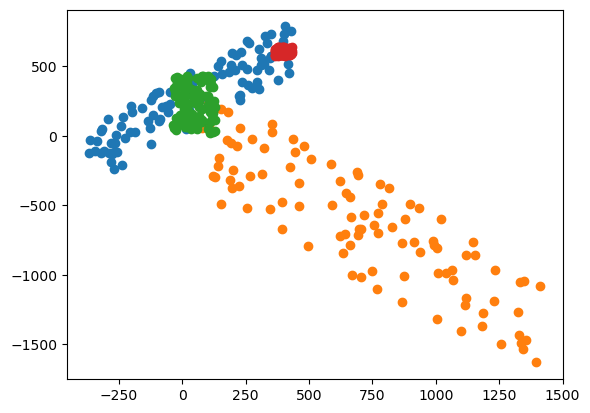

In [70]:
# b) 

## And let's plot it for a random dataset
data_settings = [{'n_points':  100, 'x_range': [ -366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [   66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  -36,  133], 'y_range': [   6,  433], 'true_slope':  0, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  366,  433], 'y_range': [ 566,  633], 'true_slope':  0, 'true_intercept': 10}]
 
my_classes = []
for i in range(len(data_settings)):
    my_classes.append(Data_generator(data_settings=data_settings[i]))
    
for i, i_class in enumerate(my_classes): 
    i_class.generate_data()
    i_class.plot_me()

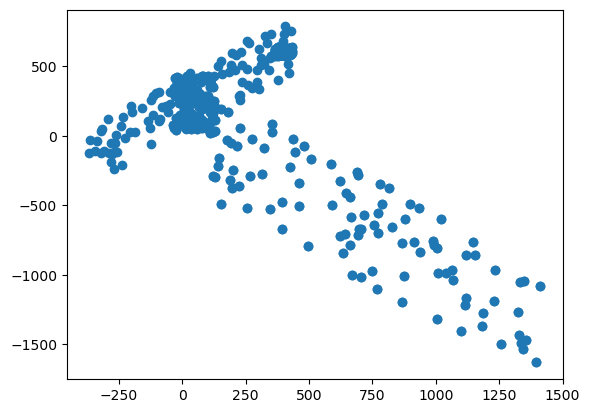

In [72]:
## c) 

my_main_class = my_classes[0]
for i in range(1, len(my_classes)):    
    my_main_class + my_classes[i] 
my_main_class.plot_me()

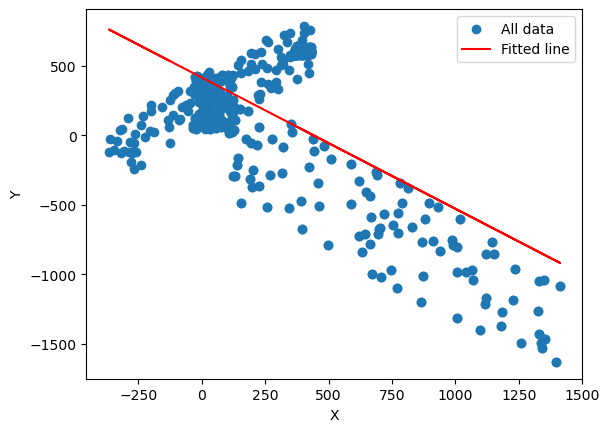

In [74]:
# d)
from sklearn.linear_model import LinearRegression

x = my_main_class.data[0]
y = my_main_class.data[1]
X = x.reshape(-1, 1)  # sklearn expects a 2D array for the features

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(x, y, label='All data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

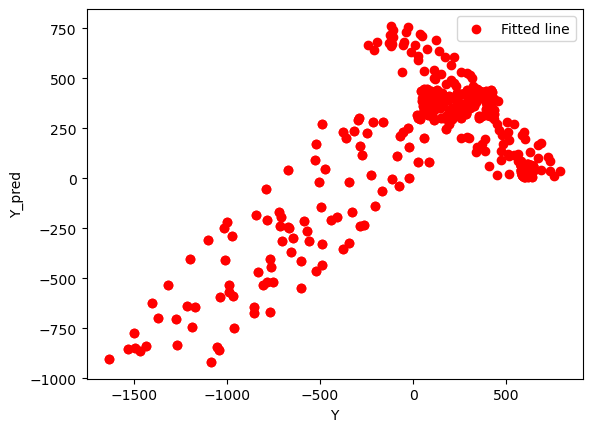

In [76]:
# e) Plot ŷ (observed) vs y (predicted) for the linear regression.
 
plt.scatter(y, y_pred, color='red', label='Fitted line')
plt.xlabel('Y')
plt.ylabel('Y_pred')
plt.legend()
plt.show()

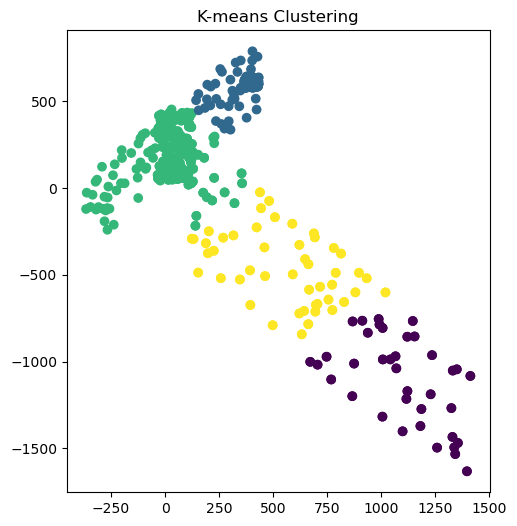

In [78]:
# f)

from sklearn.cluster import KMeans 
 
x = my_main_class.data[0]
y = my_main_class.data[1]
data = np.vstack((x, y)).T  # Combine x and y into a single data array suitable for clustering

# Apply K-means clustering
kmeans = KMeans(n_clusters=4) 
kmeans.fit(data)
labels_kmeans = kmeans.labels_
 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans)
plt.title('K-means Clustering')
plt.show()

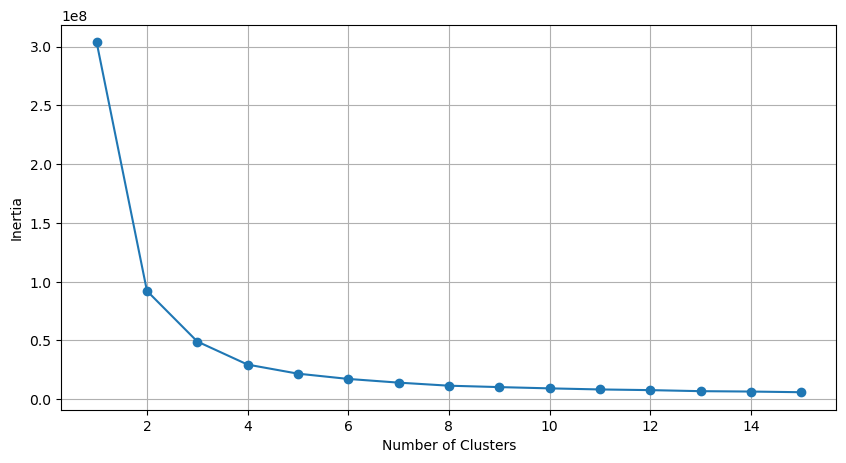

In [82]:
# g) 

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

optimise_k_means(data, 16)


In [83]:
# h) 

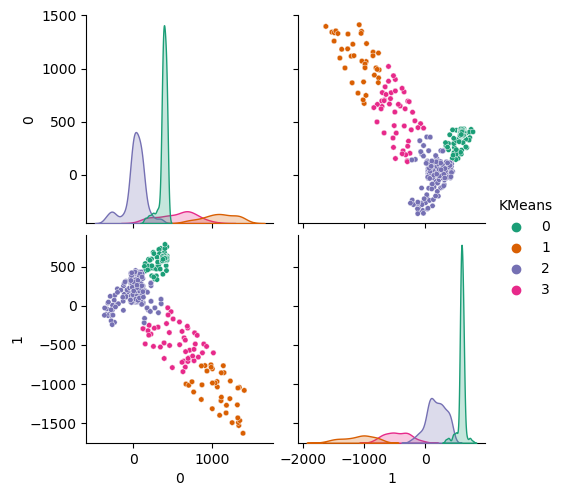

In [96]:
import seaborn as sns
import pandas as pd 

df = pd.DataFrame(data)


kmeans = KMeans(n_clusters=4)

# Fit the model to our dataset
kmeans.fit(df)

# Assign the data back to the workingdf
df['KMeans'] = kmeans.labels_


sns.pairplot(df, palette='Dark2', hue='KMeans',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

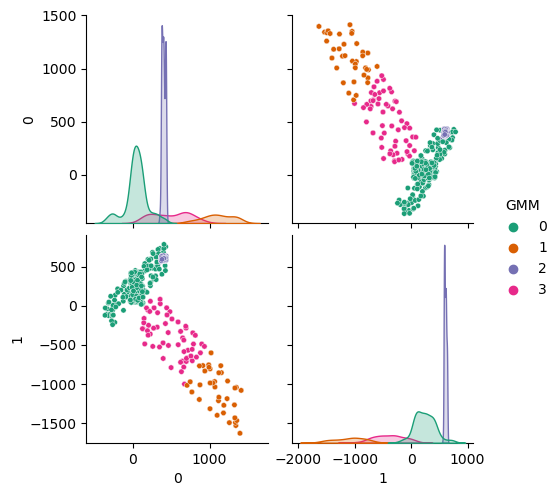

In [101]:
# m) 

from sklearn.mixture import GaussianMixture

# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=4)

# Fit the model to our dataset


df = pd.DataFrame(data)

gmm.fit(df)

# Predict the labels
gmm_labels = gmm.predict(df)

# Assign the labels back to the workingdf
df['GMM'] = gmm_labels
 

sns.pairplot(df, palette='Dark2', hue='GMM',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})